# Báo cáo Project
Lớp TTNT-154016, Nhóm G07

# Mục lục
1. Thông tin chung
    * Thành viên
2. Đề xuất project (W2-3)
    * Bài toán
    * Phương pháp
    * Phân công
3. Tiến độ giữa kỳ (W9)
    * Chương trình
    * Kết quả, vấn đề gặp phải
4. Cập nhật kết quả cuối kỳ (W15)
    * Xử lý dữ liệu
        * Tải dữ liệu
        * Tiền xử lý dữ liệu
        * Mã hóa vector
        * Chia tập dữ liệu huấn luyện, kiểm tra
    * Decision Tree (cây quyết định) và thuật toán ID3
        * Cơ sở lý thuyết về cây quyết định
        * Thuật toán ID3
            * Ý tưởng chính
            * Thuật toán
    * Chương trình thực thi Decision Tree bằng thuật toán ID3
    * Phân tích và đánh giá kết quả
        * Đánh giá độ chính xác của mô hình
        * Sự tác động của các siêu tham số vào mô hình
        * Mô hình cuối cùng và so sánh với Decision Tree của sklearn

## 1. Thông tin chung

### Thành viên
- Đỗ Huy Đạt 20220024
- Đoàn Nguyễn Hải Nam 20220035
- Lê Minh Triết 20220045
- Đàm Hồng Thái 20183625

## 2. Đề xuất project (W2-3)

### Bài toán
Phân loại Email Spam

### Phương pháp
Sử dụng Decision Tree

### Phân công
- ĐH Đạt: Xây dựng Decision Tree, đánh giá kết quả
- ĐNH Nam: Chuyển đổi dữ liệu thành vector, xây dựng Decision Tree
- LM Triết: Xây dựng Decision Tree, đánh giá kết quả
- ĐH Thái: Làm sạch, phân tích dữ liệu

## 3. Tiến độ giữa kỳ (W9)

### Chương trình
Trước hết, nhóm xây dựng một Decision Tree đơn giản dựa trên chỉ số Gini để tạo cây.
Mã nguồn lưu trong [g7_decision_tree.py](g7_decision_tree.py).

Mã nguồn cũng được triển khai trong cell dưới đây

In [1]:
import numpy as np

# Class đại diện cho một nút trong cây quyết định
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # Đặc trưng sử dụng để chia dữ liệu
        self.threshold = threshold  # Ngưỡng sử dụng để chia dữ liệu
        self.left = left            # Con trỏ tới nút con bên trái
        self.right = right          # Con trỏ tới nút con bên phải
        self.value = value          # Giá trị của nút nếu là nút lá

# Hàm tính chỉ số Gini để đo độ thuần nhất của nút
def gini(y):
    _, counts = np.unique(y, return_counts=True)  # Tìm các lớp và số lượng phần tử trong mỗi lớp
    gini = 1.0 - sum((count / len(y)) ** 2 for count in counts)  # Tính chỉ số Gini
    return gini

class G07DecisionTree():
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.tree = TreeNode()

    # Hàm fit tree với datasets
    def fit(self, X, y):
        self.tree = self.build_tree_(X, y, depth=0, max_depth=self.max_depth)
    
    # Hàm dự đoán một tập dữ liệu
    def predict(self, X):
        return np.array([self.predict_tree_(self.tree, x) for x in X])
    
    # Hàm chia dữ liệu theo đặc trưng và ngưỡng
    def split_(self, X, y, feature, threshold):
        left_mask = X[:, feature] <= threshold  # Mặt nạ để lấy các phần tử nhỏ hơn hoặc bằng ngưỡng
        right_mask = X[:, feature] > threshold  # Mặt nạ để lấy các phần tử lớn hơn ngưỡng
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    # Hàm tìm đặc trưng và ngưỡng tốt nhất để chia dữ liệu
    def best_split_(self, X, y):
        best_gini = 1.0
        best_feature = None
        best_threshold = None
        for feature in range(X.shape[1]):  # Duyệt qua từng đặc trưng
            thresholds = np.unique(X[:, feature])  # Tìm tất cả các ngưỡng duy nhất
            for threshold in thresholds:  # Duyệt qua từng ngưỡng
                X_left, X_right, y_left, y_right = self.split_(X, y, feature, threshold)  # Chia dữ liệu
                if len(y_left) == 0 or len(y_right) == 0:  # Nếu một trong hai phần trống, bỏ qua
                    continue
                gini_left = gini(y_left)  # Tính chỉ số Gini cho phần bên trái
                gini_right = gini(y_right)  # Tính chỉ số Gini cho phần bên phải
                gini_split = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)  # Tính chỉ số Gini trung bình
                if gini_split < best_gini:  # Nếu Gini nhỏ hơn, cập nhật đặc trưng và ngưỡng tốt nhất
                    best_gini = gini_split
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold
    
    # Hàm xây dựng cây quyết định đệ quy
    def build_tree_(self, X, y, depth=0, max_depth=10):
        if len(np.unique(y)) == 1:  # Nếu tất cả các phần tử cùng một lớp, trả về nút lá
            return TreeNode(value=y[0])
        if depth >= max_depth:  # Nếu độ sâu đạt giới hạn, trả về nút lá
            return TreeNode(value=np.bincount(y).argmax())  # Trả về lớp phổ biến nhất
        feature, threshold = self.best_split_(X, y)  # Tìm đặc trưng và ngưỡng tốt nhất
        if feature is None:  # Nếu không tìm được đặc trưng tốt, trả về nút lá
            return TreeNode(value=np.bincount(y).argmax())  # Trả về lớp phổ biến nhất
        X_left, X_right, y_left, y_right = self.split_(X, y, feature, threshold)  # Chia dữ liệu
        left_child = self.build_tree_(X_left, y_left, depth + 1, max_depth)  # Xây dựng nút con bên trái
        right_child = self.build_tree_(X_right, y_right, depth + 1, max_depth)  # Xây dựng nút con bên phải
        return TreeNode(feature=feature, threshold=threshold, left=left_child, right=right_child)
    
    # Hàm dự đoán giá trị dựa trên cây quyết định
    def predict_tree_(self, node, X):
        if node.value is not None:  # Nếu là nút lá, trả về giá trị của nút lá
            return node.value
        if X[node.feature] <= node.threshold:  # Nếu giá trị nhỏ hơn hoặc bằng ngưỡng, duyệt cây con bên trái
            return self.predict_tree_(node.left, X)
        else:  # Nếu giá trị lớn hơn ngưỡng, duyệt cây con bên phải
            return self.predict_tree_(node.right, X)

Sau đây là kết quả chạy thử với bộ dữ liệu đầu vào đã được mã hóa TF-IDF sang vector (chi tiết sẽ được báo cáo đầy đủ sau) 

In [2]:
import pandas as pd 

In [3]:
X = pd.read_csv('tfidf.csv')
y = pd.read_csv('tfidf_y.csv')

In [4]:
X_train = X.head(200).to_numpy()
y_train = y.head(200).to_numpy()[:,0]
X_test = X.tail(200).to_numpy()
y_test = y.tail(200).to_numpy()[:,0]

In [5]:
%%time
dtree = G07DecisionTree(max_depth=6)
dtree.fit(X_train, y_train)

CPU times: total: 2min 57s
Wall time: 7min 49s


In [ ]:
y_pred = dtree.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.575

### Kết quả, vấn đề gặp phải
Như vậy, nhóm G07 đã thử nghiệm Decision Tree đã xây dựng và đạt độ chính xác 58% khi mới chỉ huấn luyện trên 200 hàng đầu của datasets.

Tuy vậy, hạn chế vẫn còn khi huấn luyện 200 hàng đầu này đã mất khoảng 8 phút. Trong những tuần sau nhóm sẽ tập trung vào cải thiện thời gian fit cho datasets và độ chính xác của mô hình

## 4. Cập nhật kết quả cuối kỳ (W15)

### Xử lý dữ liệu 

#### Tải dữ liệu

Dữ liệu được lấy từ nguồn sau: [Spam Email Dataset](https://www.kaggle.com/datasets/venky73/spam-mails-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

import string
import pickle
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!kaggle datasets download venky73/spam-mails-dataset

Dataset URL: https://www.kaggle.com/datasets/venky73/spam-mails-dataset
License(s): CC0-1.0
spam-mails-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
with ZipFile('spam-mails-dataset.zip') as f:
    f.extractall('data/')

In [4]:
emails = pd.read_csv('data/spam_ham_dataset.csv')

In [5]:
emails.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
emails['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

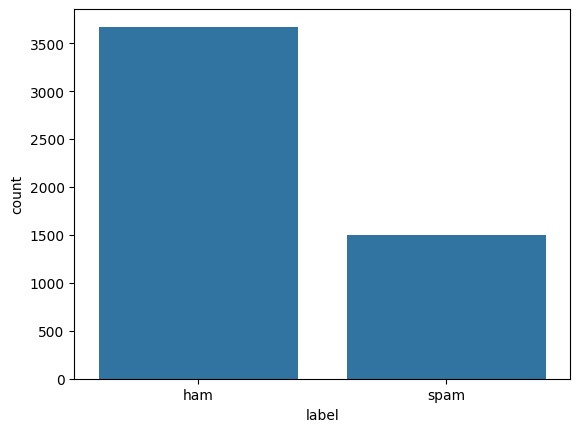

In [7]:
sns.countplot(emails, x='label')

#### Tiền xử lý dữ liệu

- Định nghĩa một hàm `preprocess_text()` để tiền xử lý dữ liệu văn bản bằng cách loại bỏ dấu câu, phân tách từ, loại bỏ từ dừng và áp dụng stemming.

- Sau đó, hàm này sẽ được áp dụng cho cột 'text' của một DataFrame có tên là `emails`, tạo ra một cột mới có tên `cleaned_text` chứa văn bản đã được xử lý.

In [8]:
def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize words
    words = text.split()
    # Remove stopwords and stemming
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

emails['cleaned_text'] = emails['text'].apply(preprocess_text)
emails.head()

,Unnamed: 0,label,text,label_num,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


Diễn giải thêm về hàm này:

1. Function Definition (preprocess_text) : Hàm này nhận một tham số duy nhất, `text`, được mong đợi là một chuỗi (nội dung của một email trong trường hợp này).

2. Removing Punctuation :
    - Đoạn code `text = ''.join([char for char in text if char not in string.punctuation])` lặp qua từng ký tự trong văn bản đầu vào và giữ lại chỉ những ký tự không phải là dấu câu.
    - Việc này được thực hiện bằng cách sử dụng một comprehension danh sách và mô-đun `string.punctuation`, chứa tất cả các ký hiệu dấu câu thông dụng.

3. Tokenizing Words : Sau khi loại bỏ dấu câu, `text.split()` được sử dụng để phân tách văn bản thành các từ riêng lẻ (tokens) dựa trên khoảng trắng. Điều này tạo ra một danh sách các từ.

4. Removing Stopwords and Stemming :
    - Stopwords là những từ thông dụng (như "và", "cái", "là", v.v.) thường được loại bỏ khỏi dữ liệu văn bản vì chúng không đóng góp nhiều vào ý nghĩa của văn bản. Hàm `stopwords.words('english')` từ thư viện nltk (Natural Language Toolkit) cung cấp một danh sách các stopwords trong tiếng Anh.

    - Stemming là quá trình rút gọn một từ về dạng cơ sở hoặc gốc của nó. Ví dụ, "running" trở thành "run." `SnowballStemmer` là một loại stemmer được cung cấp bởi thư viện nltk, được sử dụng ở đây để thực hiện quá trình stemming.

    - Đoạn code `words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]` thực hiện cả việc loại bỏ stopwords và stemming. Nó lặp qua danh sách các từ, chuyển mỗi từ thành chữ thường, kiểm tra xem nó không phải là stopwords, và sau đó thực hiện stemming bằng cách sử dụng `SnowballStemmer`.

5. Joining Words Back into a String : Các từ đã được tiền xử lý sau đó được nối lại thành một chuỗi duy nhất bằng cách sử dụng `' '.join(words)` để tạo ra phiên bản văn bản đã được làm sạch.

6. Applying the Function to the Dataset :
`emails['cleaned_text'] = emails['text'].apply(preprocess_text)` áp dụng hàm `preprocess_text` cho từng phần tử trong cột văn bản của DataFrame `emails`. Kết quả được lưu trữ trong một cột mới có tên là `cleaned_text`.

#### Mã hóa vector

Thực hiện việc trích xuất đặc trưng sử dụng Vectorizer TF-IDF để chuyển đổi dữ liệu văn bản đã được làm sạch thành dạng số có thể được sử dụng bởi các thuật toán học máy.

Viết tắt của thuật ngữ tiếng Anh term frequency – inverse document frequency,tf-idf là trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản.

Thuật toán này thường được sử dụng vì: trong ngôn ngữ luôn có những từ xảy ra thường xuyên với các từ khác.

1. Tf- term frequency : dùng để ước lượng tần xuất xuất hiện của từ trong văn bản. Tuy nhiên với mỗi văn bản thì có độ dài khác nhau, vì thế số lần xuất hiện của từ có thể nhiều hơn . Vì vậy số lần xuất hiện của từ sẽ được chia độ dài của văn bản (tổng số từ trong văn bản đó). 

    `TF(t, d) = ( số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d)`

2. IDF- Inverse Document Frequency: dùng để ước lượng mức độ quan trọng của từ đó như thế nào . Khi tính tần số xuất hiện tf thì các từ đều được coi là quan trọng như nhau. Tuy nhiên có một số từ thường được được sử dụng nhiều nhưng không quan trọng để thể hiện ý nghĩa của đoạn văn , ví dụ :
Từ nối: và, nhưng, tuy nhiên, vì thế, vì vậy, …
    * Giới từ: ở, trong, trên, …
    * Từ chỉ định: ấy, đó, nhỉ, …
    * Vì vậy ta cần giảm đi mức độ quan trọng của những từ đó bằng cách sử dụng IDF :

    `IDF(t, D) = log_e( Tổng số văn bản trong tập mẫu D/ Số văn bản có chứa từ t )`

    `TfidfVectorizer` là một kỹ thuật trích xuất đặc trưng từ thư viện scikit-learn, chuyển đổi dữ liệu văn bản thành các đặc trưng số dựa trên điểm số TF-IDF. TF-IDF đo lường tầm quan trọng của một từ trong một tài liệu so với sự xuất hiện của nó trong toàn bộ tập hợp tài liệu. Kỹ thuật này giúp giảm trọng số của những từ thường gặp (như "cái," "và," v.v.) mà ít thông tin hơn.

In [9]:
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X = tfidf_vectorizer.fit_transform(emails['cleaned_text']).toarray()

- `tfidf_vectorizer = TfidfVectorizer(max_features=2000)` khởi tạo vectorizer với tối đa 2.000 đặc trưng. Điều này có nghĩa là nó sẽ chỉ xem xét 2.000 từ hàng đầu (dựa trên điểm số TF-IDF của chúng) làm đặc trưng, giúp giảm chiều dữ liệu và chi phí tính toán.

- `X = tfidf_vectorizer.fit_transform(emails['cleaned_text']).toarray()` áp dụng biến đổi TF-IDF cho cột `cleaned_text` của DataFrame `emails`. Phương thức `fit_transform` học từ vựng từ dữ liệu văn bản và chuyển đổi nó thành một ma trận tài liệu-thuật ngữ được trọng số bằng TF-IDF. Kết quả sau đó được chuyển đổi thành một mảng NumPy bằng cách sử dụng `.toarray()`, tạo ra một ma trận `X` trong đó mỗi hàng đại diện cho một email, và mỗi cột đại diện cho một đặc trưng TF-IDF tương ứng với một từ.

#### Chia tập dữ liệu huấn luyện, kiểm tra

In [10]:
X = pd.DataFrame(X)
y = emails['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Target Variable (y): `y = emails['label_num']` gán biến mục tiêu `y` là cột `label_num` từ DataFrame `emails`. Cột này có thể chứa các nhãn số đại diện cho phân loại của các email, trong đó mỗi email được gán nhãn là "spam" (ví dụ: 1) hoặc "ham" (không phải spam, ví dụ: 0).

2. Splitting Data into Training and Testing Sets:
    - `train_test_split` là một hàm từ scikit-learn dùng để chia tập dữ liệu thành các tập huấn luyện và kiểm tra. Mô hình được huấn luyện trên tập huấn luyện và được đánh giá trên tập kiểm tra để đánh giá khả năng tổng quát của nó.

### Decision Tree (cây quyết định) và thuật toán ID3

#### Cơ sở lý thuyết về cây quyết định

Decision Tree (cây quyết định) là một mô hình học máy đưa ra kết quả dựa trên các câu hỏi. Nó có dạng như hình bên dưới
<img src= "https://github.com/trietp1253201581/Project_AI_G07/blob/main/decision_tree_sample.png?raw=true" width = "400">


Trong decision tree, các ô màu xám, lục, đỏ trên hình trên được gọi là các node. Các node thể hiện đầu ra (màu lục và đỏ) được gọi là `node lá` (`leaf node` hoặc `terminal node`). Các node thể hiện câu hỏi là các `non-leaf node`. 

`Non-leaf node` trên cùng (câu hỏi đầu tiên) được gọi là node gốc (`root node`). Các `non-leaf node` thường có hai hoặc nhiều node con (`child node`). Các child node này có thể là một leaf node hoặc một non-leaf node khác. Các child node có cùng bố mẹ được gọi là sibling node. Nếu tất cả các non-leaf node chỉ có hai child node, ta nói rằng đó là một binary decision tree (cây quyết định nhị phân). 

Các câu hỏi trong binary decision tree đều có thể đưa được về dạng câu hỏi đúng hay sai. Các decision tree mà một leaf node có nhiều child node cũng có thể được đưa về dạng một binary decision tree. Điều này có thể đạt được vì hầu hết các câu hỏi đều có thể được đưa về dạng câu hỏi đúng sai.

#### Thuật toán ID3

##### Ý tưởng chính

Trong ID3, chúng ta cần xác định thứ tự của thuộc tính cần được xem xét tại mỗi bước. Với các bài toán có nhiều thuộc tính và mỗi thuộc tính có nhiều giá trị khác nhau, việc tìm được nghiệm tối ưu thường là không khả thi. Thay vào đó, một phương pháp đơn giản thường được sử dụng là tại mỗi bước, một thuộc tính tốt nhất sẽ được chọn ra dựa trên một tiêu chuẩn nào đó (chúng ta sẽ bàn sớm). Với mỗi thuộc tính được chọn, ta chia dữ liệu vào các child node tương ứng với các giá trị của thuộc tính đó rồi tiếp tục áp dụng phương pháp này cho mỗi child node. Việc chọn ra thuộc tính tốt nhất ở mỗi bước như thế này được gọi là cách chọn greedy (tham lam). Cách chọn này có thể không phải là tối ưu, nhưng trực giác cho chúng ta thấy rằng cách làm này sẽ gần với cách làm tối ưu. Ngoài ra, cách làm này khiến cho bài toán cần giải quyết trở nên đơn giản hơn.

Sau mỗi câu hỏi, dữ liệu được phân chia vào từng child node tương ứng với các câu trả lời cho câu hỏi đó. Câu hỏi ở đây chính là một thuộc tính, câu trả lời chính là giá trị của thuộc tính đó. Để đánh giá chất lượng của một cách phân chia, chúng ta cần đi tìm một phép đo.

Trước hết, thế nào là một phép phân chia tốt? Bằng trực giác, một phép phân chia là tốt nhất nếu dữ liệu trong mỗi child node hoàn toàn thuộc vào một class–khi đó child node này có thể được coi là một leaf node, tức ta không cần phân chia thêm nữa. Nếu dữ liệu trong các child node vẫn lẫn vào nhau theo tỉ lệ lớn, ta coi rằng phép phân chia đó chưa thực sự tốt. Từ nhận xét này, ta cần có một hàm số đo độ tinh khiết (purity), hoặc độ vẩn đục (impurity) của một phép phân chia. Hàm số này sẽ cho giá trị thấp nhất nếu dữ liệu trong mỗi child node nằm trong cùng một class (tinh khiết nhất), và cho giá trị cao nếu mỗi child node có chứa dữ liệu thuộc nhiều class khác nhau.

Một hàm số có các đặc điểm này và được dùng nhiều trong lý thuyết thông tin là hàm entropy. Hàm số entropy được diễn tả trong hình dưới

<img src="https://github.com/trietp1253201581/Project_AI_G07/blob/main/entropy_func.png?raw=true" width=550>

##### Thuật toán

Trong ID3, tổng có trọng số của entropy tại các leaf-node sau khi xây dựng decision tree được coi là hàm mất mát của decision tree đó. Các trọng số ở đây tỉ lệ với số điểm dữ liệu được phân vào mỗi node. Công việc của ID3 là tìm các cách phân chia hợp lý (thứ tự chọn thuộc tính hợp lý) sao cho hàm mất mát cuối cùng đạt giá trị càng nhỏ càng tốt. Như đã đề cập, việc này đạt được bằng cách chọn ra thuộc tính sao cho nếu dùng thuộc tính đó để phân chia, entropy tại mỗi bước giảm đi một lượng lớn nhất. Bài toán xây dựng một decision tree bằng ID3 có thể chia thành các bài toán nhỏ, trong mỗi bài toán, ta chỉ cần chọn ra thuộc tính giúp cho việc phân chia đạt kết quả tốt nhất. Mỗi bài toán nhỏ này tương ứng với việc phân chia dữ liệu trong một non-leaf node. Chúng ta sẽ xây dựng phương pháp tính toán dựa trên mỗi node này.

Trước hết, **tại mỗi node**:

Xét một bài toán với $C$ class khác nhau. Giả sử ta đang làm việc với một non-leaf node với các điểm dữ liệu tạo thành một tập $\mathcal{S}$ với số phần tử là $N$. Trong các điểm này có $N_c$ điểm thuộc class $c$, với mọi $c\in \overline{1,C}$. Xác suất mỗi điểm rơi vào class $c$ được xấp xỉ bởi $\dfrac{N_c}{N}$. Như vậy entropy tại node này là
\begin{align*}
H(\mathcal{S}) = -\sum_{c=1}^C \frac{N_C}{N}\log{\frac{N_c}{N}}\tag{1}
\end{align*}
Tiếp theo, giả sử thuộc tính được chọn để chia dữ liệu là $x$. Dựa trên $x$, các điểm dữ liệu trong $\mathcal{F}$ được phân ra thành $K$ childnode là $\mathcal{S}_1,...,\mathcal{S_K}$ với số điểm trong mỗi childnode là $m_1,...,m_K$. Ta tính đại lượng để đo mức độ vẩn đục của một phép chia dựa vào $x$ trên $\mathcal{S}$ là tổng có trọng số các entropy tại $\mathcal{S}_k$ (được tính như (1)).
\begin{align*}
H(x, \mathcal{S}) = \sum_{k=1}^K\frac{m_k}{N}H(S_k)
\end{align*}
Và ta định nghĩa `gain` của node $\mathcal{S}$ dựa trên việc phân chia theo thuộc tính $x$ là
\begin{align*}
G(x, \mathcal{S}) = H(\mathcal{S}) - H(x, \mathcal{S})
\end{align*}
Trong thuật toán ID3, tại mỗi node khi phân chia, thuộc tính $x$ được chọn để phân chia là thuộc tính mà có $G(x,\mathcal{S})$ đạt giá trị lớn nhất.

**Điểm dừng** của thuật toán: 

Trong các thuật toán decision tree nói chung và ID3 nói riêng, nếu ta tiếp tục phân chia các node chưa tinh khiết, ta sẽ thu được một tree mà mọi điểm trong tập huấn luyện đều được dự đoán đúng (giả sử rằng không có hai input giống nhau nào cho output khác nhau). Khi đó, tree có thể sẽ rất phức tạp (nhiều node) với nhiều leaf node chỉ có một vài điểm dữ liệu. Như vậy, nhiều khả năng overfitting sẽ xảy ra.

Để tránh overfitting, một trong số các phương pháp sau có thể được sử dụng. Tại một node, nếu một trong số các điều kiện sau đây xảy ra, ta không tiếp tục phân chia node đó và coi nó là một leaf node:

* nếu node đó có entropy bằng 0, tức mọi điểm trong node đều thuộc một class.

* nếu node đó có số phần tử nhỏ hơn một ngưỡng nào đó. Trong trường hợp này, ta chấp nhận có một số điểm bị phân lớp sai để tránh overfitting. Class cho leaf node này có thể được xác định dựa trên class chiếm đa số trong node.

* nếu khoảng cách từ node đó đến root node đạt tới một giá trị nào đó. Việc hạn chế chiều sâu của tree này làm giảm độ phức tạp của tree và phần nào giúp tránh overfitting.

* nếu tổng số leaf node vượt quá một ngưỡng nào đó.

* nếu việc phân chia node đó không làm giảm entropy quá nhiều (information gain nhỏ hơn một ngưỡng nào đó).

### Chương trình thực thi Decision Tree bằng thuật toán ID3

Trước hết, ta tạo mỗi cấu trúc TreeNode với các thông tin cần thiết, bao gồm
* Những điểm dữ liệu thuộc node này
* Độ sâu của Node
* Thuộc tính được chọn để chia nhỏ ở nút này (nếu không phải nút lá)
* Danh sách các nút con sau khi phân chia
* Các giá trị thuộc tính chia nhỏ (hay các ngưỡng chia) trong các nút con
* Nhãn (nếu là nút lá).

In [11]:
from __future__ import print_function  # Đảm bảo tương thích với phiên bản Python 2 và 3

class TreeNode(object):
    def __init__(self, ids=None, children=[], entropy=0, depth=0):
        self.ids = ids  # Danh sách các chỉ số dữ liệu trong nút này
        self.entropy = entropy  # Độ đo entropy của nút, sẽ được tính sau
        self.depth = depth  # Độ sâu của nút so với nút gốc
        self.split_attribute = None  # Thuộc tính được chọn để chia nhỏ, nếu không phải là nút lá
        self.children = children  # Danh sách các nút con của nút hiện tại
        self.order = None  # Thứ tự các giá trị của thuộc tính chia nhỏ trong các nút con
        self.label = None  # Nhãn của nút nếu nó là nút lá
        
    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute  
        self.order = order  

    def set_label(self, label):
        self.label = label 

Tiếp theo là hàm entropy để tính entropy của một phân phối theo công thức ở phần trước

In [13]:
def entropy(freq):
    freq_0 = freq[np.array(freq).nonzero()[0]]  # Loại bỏ tần số bằng 0
    prob_0 = freq_0 / float(freq_0.sum())  # Tính xác suất của mỗi tần số
    return -np.sum(prob_0 * np.log(prob_0))  # Tính entropy

Cuối cùng là lớp DecisionTreeID3 để minh họa cách xây dựng một Decision Tree bằng thuật toán ID3, nó sẽ gồm các siêu tham số sau để tránh overfitting (tương ứng những gì đã trình bày ở phần trước):
* `max_depth`: giới hạn độ sâu của cây.
* `min_samples_split`: số mẫu tối thiểu cần có ở mỗi node con khi áp dụng chia thuộc tính ở node cha.
* `min_gain`: giá trị gain tối thiểu để áp dụng một cách phân chia ở một node.
* `max_bin`: số lượng ngưỡng tối đa được tạo ra để chia tách một thuộc tính numeric (sẽ được trình bày kĩ hơn ở dưới).
Lớp này gồm các phương thức quan trọng:
* `fit(data, target)`: Xây dựng cây dựa trên dữ liệu huấn luyện là `data` và nhãn tương ứng là `target`. Nó sẽ lấy node gốc (root) là node chứa toàn bộ dữ liệu và bắt đầu phân chia dựa vào hàm `split`.
* `split(node)`: Chia một Node bằng thuật toán ID3. Nó sẽ duyệt qua từng thuộc tính (đặc trưng) của dữ liệu và tính toán gain cho mỗi thuộc tính theo cách đã được trình bày ở phần trước. Cuối cùng, nó sẽ chọn thuộc tính mà sau khi sử dụng để chia thì có gain cao nhất và trả về danh sách các nút con được chia.

Có một chú ý thêm rằng, trong khi chia:
* Nếu thuộc tính là categorical thì giá trị thuộc tính tại các node con chính là các giá trị duy nhất có thể có của thuộc tính đó trong bộ dữ liệu.
* Nếu thuộc tính là numeric thì sẽ dùng các ngưỡng để phân chia các dữ liệu vào các nút con (ví dụ `<7`, `>=7 & <8`, etc.). Ngưỡng được chọn chính là trung bình cộng 2 giá trị liên tiếp trong tập giá trị đã được sắp xếp của thuộc tính này. Tuy nhiên, nếu số lượng ngưỡng được tạo ra vượt qua `max_bin` thì các ngưỡng sẽ được chọn ngẫu nhiên để đảm bảo có nhiều nhất `max_bin` ngưỡng.

In [14]:
class DecisionTreeID3(object):
    def __init__(self, max_depth=8, min_samples_split=2, min_gain=1e-4, max_bin=8):
        self.root = None  # Nút gốc của cây quyết định
        self.max_depth = max_depth  # Độ sâu tối đa của cây
        self.min_samples_split = min_samples_split  # Số mẫu tối thiểu để chia nhỏ một nút
        self.Ntrain = 0  # Số lượng mẫu trong tập huấn luyện
        self.min_gain = min_gain  # Mức gain tối thiểu để chia nhỏ tiếp tục
        self.max_bin = max_bin # Số lượng ngưỡng tối đa để phân chia dữ liệu liên tục
    
    def fit(self, data, target):
        self.Ntrain = data.count()[0]  # Đếm số lượng mẫu trong tập dữ liệu
        self.data = data  
        self.attributes = list(data)  # Lấy danh sách các thuộc tính
        self.target = target  
        self.labels = target.unique()  # Lấy các nhãn mục tiêu duy nhất
        
        ids = range(self.Ntrain)  # Tạo danh sách các chỉ số mẫu dữ liệu
        self.root = TreeNode(ids=ids, entropy=self._entropy(ids), depth=0)  # Tạo nút gốc với toàn bộ dữ liệu
        queue = [self.root]  
        while queue:
            node = queue.pop()  
            # Nếu chưa đạt tới độ sâu giới hạn hoặc entropy vẫn lớn hơn mức thông tin nhỏ nhất để chia
            if node.depth < self.max_depth or node.entropy < self.min_gain:
                node.children = self._split(node)  
                if not node.children:  # Nếu không có nút con, đặt nhãn cho nút
                    self._set_label(node)
                queue += node.children  # Thêm các nút con vào hàng đợi
            else:
                self._set_label(node)  # Nếu không thể chia nhỏ thêm, đặt nhãn cho nút
                
    def _entropy(self, ids):
        if len(ids) == 0:
            return 0
        freq = np.array(self.target.iloc[ids].value_counts())  # Đếm tần số của các nhãn mục tiêu
        return entropy(freq)  # Tính entropy dựa trên tần số
    
    def _set_label(self, node):
        target_ids = node.ids
        node.set_label(self.target.iloc[target_ids].mode()[0])  # Đặt nhãn cho nút lá bằng giá trị mode của các nhãn mục tiêu
    
    def _split(self, node):
        ids = node.ids  # Lấy danh sách các chỉ số dữ liệu trong nút hiện tại
        best_gain = 0  
        best_splits = []  # Khởi tạo danh sách các cách chia nhỏ tốt nhất
        best_attribute = None 
        order = None  
        sub_data = self.data.iloc[ids, :]  # Lấy tập dữ liệu con tương ứng với các chỉ số dữ liệu của nút hiện tại

        for i, att in enumerate(self.attributes):  # Duyệt qua từng đặc trưng 
            values = sub_data[att].unique()  
            if len(values) == 1:  # Nếu đặc trưng chỉ có một giá trị duy nhất, bỏ qua đặc trưng này
                continue
            if np.issubdtype(values.dtype, np.number):  # Kiểm tra nếu thuộc tính là liên tục
                # Lấy các ngưỡng chia 
                sorted_values = np.sort(values)
                thresholds = [(sorted_values[j] + sorted_values[j + 1]) / 2 for j in range(len(sorted_values) - 1)]
                # Giới hạn ngưỡng chia
                if len(thresholds) > self.max_bin:
                    thresholds = np.random.choice(thresholds, self.max_bin, replace=False)
                    
                for threshold in thresholds:  # Duyệt qua các ngưỡng để kiểm tra
                    splits = [
                        [self.data.index.get_loc(idx) for idx in sub_data.index[sub_data[att] <= threshold]],  # Dữ liệu có giá trị <= ngưỡng
                        [self.data.index.get_loc(idx) for idx in sub_data.index[sub_data[att] > threshold]]  # Dữ liệu có giá trị > ngưỡng
                    ]
                    if min(map(len, splits)) < self.min_samples_split:  # Kiểm tra nếu một trong các cách chia nhỏ có số lượng mẫu nhỏ hơn min_samples_split
                        continue
                    HxS = 0  # Khởi tạo tổng entropy có trọng số
                    for split in splits:  
                        HxS += len(split) * self._entropy(split) / len(ids)  # Tính entropy có trọng số của cách chia nhỏ hiện tại
                    gain = node.entropy - HxS  # Tính gain cho cách chia nhỏ hiện tại
                    if gain < self.min_gain:  
                        continue
                    if gain > best_gain:  
                        best_gain = gain
                        best_splits = splits
                        best_attribute = att
                        order = [f"<= {threshold}", f"> {threshold}"]
            else:  # Xử lý các thuộc tính categorical
                splits = []  
                for val in values:  
                    sub_ids = sub_data.index[sub_data[att] == val].tolist()  # Lấy danh sách các chỉ số dữ liệu có giá trị hiện tại của đặc trưng
                    splits.append([self.data.index.get_loc(idx) for idx in sub_ids])  # Thêm danh sách chỉ số vào danh sách các cách chia nhỏ
                if min(map(len, splits)) < self.min_samples_split:  
                    continue
                HxS = 0  # Khởi tạo tổng entropy có trọng số
                for split in splits:  # Duyệt qua từng cách chia nhỏ
                    HxS += len(split) * self._entropy(split) / len(ids)  # Tính entropy có trọng số của cách chia nhỏ hiện tại
                gain = node.entropy - HxS  # Tính gain cho cách chia nhỏ hiện tại
                if gain < self.min_gain:  
                    continue
                if gain > best_gain:  
                    best_gain = gain
                    best_splits = splits
                    best_attribute = att
                    order = values
                    
        node.set_properties(best_attribute, order)  # Thiết lập thuộc tính chia nhỏ và thứ tự giá trị tốt nhất cho nút hiện tại
        child_nodes = [
            TreeNode(ids=split, entropy=self._entropy(split), depth=node.depth + 1)  
            for split in best_splits
        ]
        return child_nodes  # Trả về danh sách các nút con


    def predict(self, new_data):
        """
        :param new_data: a new dataframe, each row is a datapoint
        :return: predicted labels for each row
        """
        npoints = new_data.count()[0]
        labels = [None] * npoints
        for n in range(npoints):
            x = new_data.iloc[n, :]  # Lấy một điểm dữ liệu 
            node = self.root
            while node.children:
                if isinstance(node.order[0], str) and "<=" in node.order[0]:  # Kiểm tra nếu thuộc tính là liên tục
                    threshold = float(node.order[0].split(" ")[1])  # Tách ngưỡng từ chuỗi
                    if x[node.split_attribute] <= threshold:
                        node = node.children[0]  # Đi xuống nhánh trái nếu giá trị nhỏ hơn hoặc bằng ngưỡng
                    else:
                        node = node.children[1]  # Đi xuống nhánh phải nếu giá trị lớn hơn ngưỡng
                else:
                    node = node.children[node.order.index(x[node.split_attribute])]  # Xử lý thuộc tính categorical
            labels[n] = node.label  
            
        return labels  


### Phân tích và đánh giá kết quả

Trong phần này, vì dữ liệu bị mất cân bằng (71% mang nhãn 0 và 29% mang nhãn 1) nên nhóm sẽ sử dụng 2 chỉ số khác nhau để đo lường độ chính xác của mô hình:
* Accuracy: tỷ lệ số lượng dự đoán đúng trên tổng số dự đoán
\begin{align*}
accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{align*}
* F1 Score:
\begin{align*}
f1_score = 2\cdot\frac{precision\cdot recall}{precision+recall}
\end{align*}
Trong đó precison là thước đo mức độ chính xác của các dự đoán dương tính của mô hình: $precision=\frac{TP}{TP+FP}$.
Và recall là thước đo mức độ đầy đủ của các dự đoán dương tính của mô hình $recall=\frac{TP}{TP+FN}$.

Trong các công thức trên
* TP: True Positives (Số lượng dự đoán đúng mà thực tế cũng đúng)

* TN: True Negatives (Số lượng dự đoán sai mà thực tế cũng sai)

* FP: False Positives (Số lượng dự đoán đúng mà thực tế sai)

* FN: False Negatives (Số lượng dự đoán sai mà thực tế đúng)

Ngoài ra, nhóm cũng sẽ xem xét tác động của các siêu tham số được đưa vào và vai trò của nó trong giảm thiểu overfitting

#### Đánh giá độ chính xác của mô hình

Trước hết ta xem xét độ chính xác của mô hình sử dụng các siêu tham số mặc định

In [14]:
%%time
tree = DecisionTreeID3()
tree.fit(X_train, y_train)

CPU times: total: 2min 20s
Wall time: 5min 52s


Bây giờ ta xem xét 2 chỉ số là accuracy và f1 score trên bộ test.

In [15]:
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.885024154589372

In [16]:
f1_score(y_test, y_pred)

0.8272859216255443

Accuracy khá cao (88.5%) nhưng điều tốt hơn cả là f1 score cũng cao (82.7%), điều này đặc biệt có ý nghĩa khi phân bố nhãn ban đầu là không cân bằng, cho thấy mô hình của nhóm hoạt động tốt ngay cả khi dữ liệu bị mất cân bằng, nghĩa là mô hình không bỏ sót quá nhiều nhãn 1 (Recall cao) và đồng thời không dự đoán nhãn 1 quá nhiều sai (Precision cao).

#### Sự tác động của các siêu tham số vào mô hình

Để xem xét sự tác động của các siêu tham số và mô hình, ta sẽ xem xét chỉ số f1 trên bộ dữ liệu train và test. Với bộ dữ liệu train, ta sẽ chia thành 2 phần train và valid, trong đó tập validation để điều chỉnh siêu tham số tránh quá khớp.

In [15]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
len(X_train), len(X_train1), len(X_valid1), len(X_test)

(4136, 3308, 828, 1035)

Test max_depth=3 successfully.
Test max_depth=4 successfully.
Test max_depth=5 successfully.
Test max_depth=6 successfully.
Test max_depth=7 successfully.
Test max_depth=8 successfully.
Test max_depth=9 successfully.
Test max_depth=10 successfully.
Test max_depth=12 successfully.
Test max_depth=14 successfully.
Test max_depth=16 successfully.
Test max_depth=18 successfully.
Test max_depth=20 successfully.
Test max_depth=22 successfully.
Test max_depth=25 successfully.


Text(0.5, 1.0, 'F1 Score for max depth')

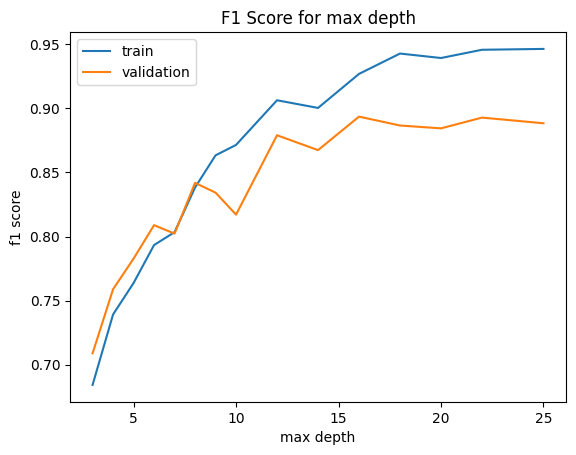

In [20]:
train_scores = []
valid_scores = []
max_depth_values = [3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 25]

for min_samples_split in max_depth_values:
    tree = DecisionTreeID3(max_depth=min_samples_split)
    tree.fit(X_train1, y_train1)
    # train score
    y_pred = tree.predict(X_train1)
    train_scores.append(f1_score(y_train1, y_pred))
    # val score
    y_pred = tree.predict(X_valid1)
    valid_scores.append(f1_score(y_valid1, y_pred))
    print(f"Test max_depth={min_samples_split} successfully.")
   
# Plot
plt.plot(max_depth_values, train_scores, label='train')
plt.plot(max_depth_values, valid_scores, label='validation')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('f1 score')
plt.title('F1 Score for max depth')

In [21]:
scores = {
    'train f1 score': train_scores,
    'validation f1 score': valid_scores
}

df = pd.DataFrame(scores, index=max_depth_values)
df.style.background_gradient('cool')

,train f1 score,validation f1 score
3,0.684155,0.708824
4,0.739164,0.758842
5,0.763695,0.782753
6,0.793361,0.808874
7,0.803411,0.802281
8,0.838307,0.841912
9,0.863378,0.834286
10,0.871524,0.817121
12,0.906399,0.879079
14,0.900394,0.867470


Có thể thấy khi `max_depth>=16`, khi f1 score của train set tăng thì f1 score của validation set giảm, vì vậy nếu tăng tiếp `max_depth` có thể gặp overfitting. Từ bảng ta cũng có thể thấy có vè `max_depth=16` là giá trị mang lại f1 score cao nhất trên tập validation nhưng score trên tập train không phải cao nhất.

Ta thử f1 score của train, validation và test set khi `max_depth=16`

In [17]:
tree = DecisionTreeID3(max_depth=16)
tree.fit(X_train1, y_train1)

In [22]:
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc}, F1 Score: {f1}")

Accuracy: 0.9227053140096618, F1 Score: 0.8726114649681529


Như vậy sử dụng tham số `max_depth=16` so với `max_depth=8` (mặc định) đã giúp tăng F1 Score trên bộ dữ liêu test từ 82.7% lên tới 87.3%. Do vậy, có thể thấy siêu tham số `max_depth` đóng vai trò quan trọng trong việc tăng độ chính xác trên bộ dữ liệu huấn luyện và kiểm tra. Tuy vậy nếu `max_depth` quá cao thì sẽ dẫn tới tình trạng overfitting.

Ngoài ra, khi điều chỉnh các siêu tham số khác cũng cho các kết quả khác nhau. Ví dụ dưới đây là khi điều chỉnh tham số `min_samples_split` (số lượng mẫu nhỏ nhất để được phép chia node)

Test min_samples_split=2 successfully.
Test min_samples_split=5 successfully.
Test min_samples_split=8 successfully.
Test min_samples_split=11 successfully.
Test min_samples_split=15 successfully.


Text(0.5, 1.0, 'F1 Score for min samples split & max depth = 16')

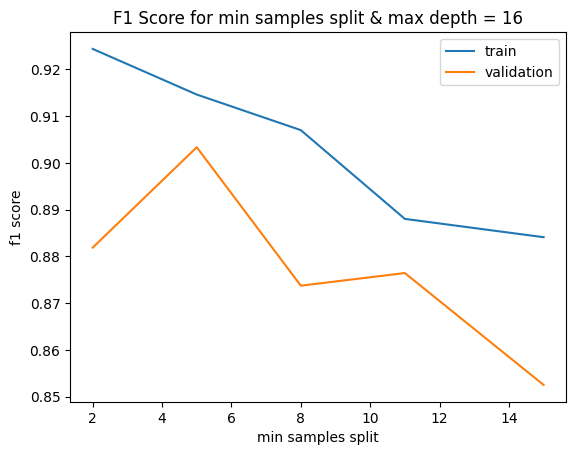

In [26]:
train_scores = []
valid_scores = []
min_samples_split_values = [2, 5, 8, 11, 15]

for min_samples_split in min_samples_split_values:
    tree = DecisionTreeID3(min_samples_split=min_samples_split, max_depth=16)
    tree.fit(X_train1, y_train1)
    # train score
    y_pred = tree.predict(X_train1)
    train_scores.append(f1_score(y_train1, y_pred))
    # val score
    y_pred = tree.predict(X_valid1)
    valid_scores.append(f1_score(y_valid1, y_pred))
    print(f"Test min_samples_split={min_samples_split} successfully.")
   
# Plot
plt.plot(min_samples_split_values, train_scores, label='train')
plt.plot(min_samples_split_values, valid_scores, label='validation')
plt.legend()
plt.xlabel('min samples split')
plt.ylabel('f1 score')
plt.title('F1 Score for min samples split & max depth = 16')

In [27]:
scores = {
    'train f1 score': train_scores,
    'validation f1 score': valid_scores
}

df = pd.DataFrame(scores, index=min_samples_split_values)
df.style.background_gradient('cool')

,train f1 score,validation f1 score
2,0.924378,0.881890
5,0.914622,0.903353
8,0.907011,0.873747
11,0.888031,0.876448
15,0.884116,0.852525


Như vậy ta chọn `min_samples_split=5` thì có thể tăng cao f1 score trên tập validation và bây giờ hãy xem xét trên tập test

In [28]:
tree = DecisionTreeID3(max_depth=16, min_samples_split=5)
tree.fit(X_train1, y_train1)

In [29]:
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc}, F1 Score: {f1}")

Accuracy: 0.9188405797101449, F1 Score: 0.8683385579937304


Như vậy, tuy f1 score trên tập validation tăng nhưng trên tập test lại giảm. Điều này có thể do tập validation không đại diện/ bao gồm đầy đủ các tình huống có thể xảy ra trong tập test (dữ liệu mới trong tương lai), hoặc tập validation khá trùng khớp với tập train. Để khắc phục có thể dùng cross validation hoặc thêm dữ liệu. Do khuôn khổ của project nên nhóm sẽ không trình bày ở trong báo cáo này.

#### Mô hình cuối cùng và so sánh với Decision Tree của sklearn

Nhóm lựa chọn mô hình cuối cùng, với độ chính xác (f1 score) 87.3% trên tập test là

In [31]:
tree = DecisionTreeID3(max_depth=16)

Bây giờ ta xem xét độ chính xác của mô hình Decision Tree của sklearn.

In [32]:
from sklearn.tree import DecisionTreeClassifier
sklearn_tree = DecisionTreeClassifier(max_depth=16, min_weight_fraction_leaf=1e-4)

In [33]:
sklearn_tree.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=16, min_weight_fraction_leaf=0.0001)

In [35]:
y_pred = sklearn_tree.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
f1 = f1_score(y_train1, y_pred)
print(f"Train Set: Accuracy: {acc}, F1 Score: {f1}")

y_pred = sklearn_tree.predict(X_valid1)
acc = accuracy_score(y_valid1, y_pred)
f1 = f1_score(y_valid1, y_pred)
print(f"Validation Set: Accuracy: {acc}, F1 Score: {f1}")

y_pred = sklearn_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Test Set: Accuracy: {acc}, F1 Score: {f1}")

Train Set: Accuracy: 0.9682587666263603, F1 Score: 0.9484029484029484
Validation Set: Accuracy: 0.927536231884058, F1 Score: 0.8814229249011858
Test Set: Accuracy: 0.9256038647342996, F1 Score: 0.8768


Độ chính xác của tập test trên mô hình của `sklearn` là 87.7%, cao hơn một chút so với mô hình mà nhóm đưa ra. Vì vậy, có thể nói mô hình Decision Tree sử dụng ID3 của nhóm đủ tốt, nói riêng với bộ dữ liệu này. 